<a href="https://colab.research.google.com/github/johnny-tran/COGS108_repo/blob/master/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COGS 108 - Final Project

## Important

- ONE, and only one, member of your group should upload this notebook to TritonED. 
- Each member of the group will receive the same grade on this assignment. 
- Keep the file name the same: submit the file 'FinalProject.ipynb'.
- Only upload the .ipynb file to TED, do not upload any associted data. Make sure that for cells in which you want graders to see output that these cells have been executed.

## Group Members: Fill in the Student IDs of each group member here

Replace the lines below to list each persons full student ID, ucsd email and full name.

- A11888496 - L4truong@ucsd.edu - Loc Truong
- A15352670 - t8wei@ucsd.edu - Timothy Wei
- A14732783 - jpt017@ucsd.edu - Jonathan Tran
- A11962666 - nnowain@ucsd.edu - Nathan Nowain
- A14493674 - cvshanno@ucsd.edu - Collin Shannon



# Introduction and Background

## Research Question

> Are there any correlations to make/color/body type to violation types?
How does visual appearance affect the likelihood of receiving a parking violation? Do certain makes/models or colors receive more tickets than expected?


## Hypothesis

> We predict that loud colors & higher end models have a higher chance of receiving violations.
We hypothesize that visual appearance does affect the likelihood of receiving a parking violation. We expect that parking officials are more likely to notice cars that have loud colors and higher end models and thus more likely to give them a ticket.


## Background

> We believe that there are biases that are imposed from humans as they do their job, such as parking enforcement. There is a typically well known statement that cops and parking enforcement have to meet quotas monthly to keep them on goal as they do their job. Besides this commonly heard phenomena, is there also a possible data to show that some cars also get more tickets than others? With further research we found there are many articles online which sum up reasons why one might be more likely to get a ticket; and some of their data show that certain vehicle makes and models, more notably the expensive and luxurious make and models, receive more speeding tickets [1]. There is also a well known statistic that red colored cars get pulled over more than others, which is most likely related to its high visibility over other colored cars [2].

> With this in mind, we supposed there can be a possible correlation to be found. As we hypothesized, we believe that cars of certain visible attributes like color or make can possibly increase their likelihood of receiving a ticket in comparison to other vehicles which may not attract as much attention. We believe this is important because we want to see if there are possible implicit biases in how parking enforcement gives out violations. This data could help better inform people before choosing a car to buy, if they care or to just find an interesting relationship to human cognition and how perception alters thinking.
  
> ### References

>> 1) https://www.more.com/lifestyle/6-things-almost-guarantee-speeding-ticket

>> 2) http://www.brettrics.com/9-million-parking-tickets-la/


# Data Description

Dataset Name: Los Angeles Parking Citations

>The dataset consists of 19 variables based on the information on the ticket slip. This includes ticket date, issue time, meter id, make, body style, color, location, route, agency, violation code, violation description, fine amount, and location data.

> Link to the dataset: https://data.lacity.org/A-Well-Run-City/Parking-Citations/wjz9-h9np

> Kaggle link: https://www.kaggle.com/cityofLA/los-angeles-parking-citations

# Import tools and libraries

**Before we begin manipulating the data, we import necessary libraries.**

In [1]:
# Imports
%matplotlib inline

import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# read PDF via tabula
import tabula
!pip install tabula-py

# Part 1: Vehicle Color

## *Data Cleaning / Pre Processing*

**The main goal of our project is to determine any possible correlations between parking citations and vehicles. Here, we import our dataset from Los Angeles Parking Citations as a dataframe and we name it PC_df.**

In [2]:
# read parking citations(PC) file
PC_df = pd.read_csv('parking-citations.csv')
PC_df.head()


/Users/Johnny/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,1103341116,2015-12-21T00:00:00,1251.0,NaN,NaN,CA,200304.0,NaN,HOND,PA,GY,13147 WELBY WAY,01521,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
1,1103700150,2015-12-21T00:00:00,1435.0,NaN,NaN,CA,201512.0,NaN,GMC,VN,WH,525 S MAIN ST,1C51,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
2,1104803000,2015-12-21T00:00:00,2055.0,NaN,NaN,CA,201503.0,NaN,NISS,PA,BK,200 WORLD WAY,2R2,2.0,8939,WHITE CURB,58.0,6439997.9,1802686.4
3,1104820732,2015-12-26T00:00:00,1515.0,NaN,NaN,CA,NaN,NaN,ACUR,PA,WH,100 WORLD WAY,2F11,2.0,000,17104h,NaN,6440041.1,1802686.2
4,1105461453,2015-09-15T00:00:00,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,BK,GEORGIA ST/OLYMPIC,1FB70,1.0,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0


**We also import and interpret the agency codes found in PC_df into a dataframe called AC_df. Because the agency code dataset is a pdf, we utilize the imported tabula tool.**

In [3]:
# read agency codes(AC) file
from tabula import read_pdf
AC_df = read_pdf('LADOT-Xerox Crib Sheet Agency Codes 12-31-2015.pdf')

# set header to top row
new_header = AC_df.iloc[0]
AC_df = AC_df[1:]
AC_df.columns = new_header

# print head to check
AC_df.head()


,CODE,AGENCY NAME,NAME
1,1,WESTERN,WESTERN
2,2,LAX CURRENT,LAX CUR
3,3,VALLEY,VALLEY
4,4,HOLLYWOOD,HOLLYWOOD
5,5,SOUTHERN,SOUTHERN


**The main goal for our project is to analyze correlations between vehicle color, make, and parking citations given. We clean up our data by removing unnecessary columns and by dropping any rows with missing data.**

In [4]:
# remove unnecessary columns
PC_df = PC_df.drop(['Ticket number', 'Issue Date', 'Issue time', 'Meter Id', 'Marked Time', 'RP State Plate', 'Plate Expiry Date', 'VIN', 'Location', 'Route', 'Fine amount', 'Latitude', 'Longitude'], axis=1)

#drop rows with nan
PC_df = PC_df.dropna(axis=0)

PC_df.head()


,Make,Body Style,Color,Agency,Violation code,Violation Description
0,HOND,PA,GY,1.0,4000A1,NO EVIDENCE OF REG
1,GMC,VN,WH,1.0,4000A1,NO EVIDENCE OF REG
2,NISS,PA,BK,2.0,8939,WHITE CURB
3,ACUR,PA,WH,2.0,000,17104h
4,CHEV,PA,BK,1.0,8069A,NO STOPPING/STANDING


**We will then extract all the unique agencies in PC_df and count them.**

In [5]:
# find all unique counts of Agencies
unique_agency_count = PC_df['Agency'].unique()
agency_count = unique_agency_count.size

print("We are looking at citations from ", agency_count,
      " different agencies in LA.")


We are looking at citations from  44  different agencies in LA.


**We first approached our dataset by analyzing vehicle color with the number of tickets received. Because various agencies may indicate vehicle color differently, we create a function called standardize_color to standardize the various colors into more general terms.**

In [6]:
#standardize colors function
def standardize_color(string):
    
    if "GY" in string:
        output = "GRAY"
    elif "GR" in string:
        output = "GRAY"
    elif "WH" in string:
        output = "WHITE"
    elif "WT" in string:
        output = "WHITE"
    elif "BK" in string:
        output = "BLACK"
    elif "BL" in string:
        output = "BLUE"
    elif "BE" in string:
        output = "BLUE"
    elif "CO" in string:
        output = "BLUE"
    elif "BR" in string:
        output = "BROWN"
    elif "SI" in string:
        output = "SILVER"
    elif "SL" in string:
        output = "SILVER"
    elif "GO" in string:
        output = "GOLD"
    elif "RE" in string:
        output = "RED"
    elif "RD" in string:
        output = "RED"
    elif "BU" in string:
        output = "RED"
    elif "BG" in string:
        output = "RED"
    elif "ME" in string:
        output = "RED"
    elif "MR" in string:
        output = "RED"
    elif "MA" in string:
        output = "RED"
    elif "TA" in string:
        output = "TAN"
    elif "TN" in string:
        output = "TAN"
    elif "YE" in string:
        output = "YELLOW"
    elif "RD" in string:
        output = "RED"
    elif "OR" in string:
        output = "ORANGE"
    elif "OT" in string:
        output = "ORANGE"
    elif "BN" in string:
        output = "BROWN"
    elif "GN" in string:
        output = "GREEN"
    elif "PR" in string:
        output = "PURPLE"
    elif "PU" in string:
        output = "PURPLE"
    elif "PL" in string:
        output = "PURPLE"
    elif "PE" in string:
        output = "PURPLE"
    elif "TU" in string:
        output = "BLUE"
    elif "TE" in string:
        output = "BLUE"
    elif "TE" in string:
        output = "BLUE"
    elif "TE" in string:
        output = "BLUE"
    elif "GL" in string:
        output = "GOLD"
    elif "YL" in string:
        output = "YELLOW"
    elif "MU" in string:
        output = "YELLOW"
    elif "AQ" in string:
        output = "BLUE"
    elif "W" in string:
        output = "WHITE"
    elif "SA" in string:
        output = "TAN"
    elif "WI" in string:
        output = "WHITE"
    elif "TE" in string:
        output = "BLUE"
    #otherwise, keep as is
    else:
        output = "OTHER"
    
    return output

**We then apply standardize_color to our dataframe, PC_df, and verify that all the colors indicated have transformed.**

In [7]:
# apply standardize_color function
PC_df['Color'] = PC_df['Color'].apply(standardize_color)
PC_df.head()

,Make,Body Style,Color,Agency,Violation code,Violation Description
0,HOND,PA,GRAY,1.0,4000A1,NO EVIDENCE OF REG
1,GMC,VN,WHITE,1.0,4000A1,NO EVIDENCE OF REG
2,NISS,PA,BLACK,2.0,8939,WHITE CURB
3,ACUR,PA,WHITE,2.0,000,17104h
4,CHEV,PA,BLACK,1.0,8069A,NO STOPPING/STANDING


## *Data Visualization*

## Ideas

> ### Graphs:

> Color vs. # of tix

> Model vs. # of tix

> Color + model vs. # of tix

> Color vs. type of tix

>Model vs. type of tix

>Color + model vs. type of tix

**To visualize what we are working with so far, we count the number of values per color and place it on a bar and pie graph.**

WHITE     1922439
BLACK     1892963
GRAY      1722267
SILVER    1155653
BLUE       691872
RED        631179
GREEN      251813
BROWN      179378
GOLD       115200
ORANGE      81073
TAN         73429
YELLOW      35544
PURPLE      16929
OTHER        8637
Name: Color, dtype: int64


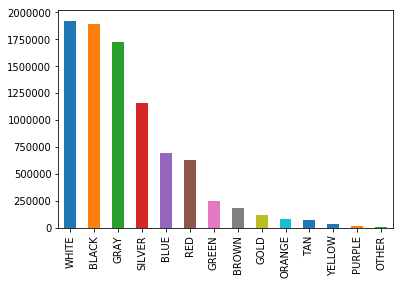

In [8]:
color = PC_df['Color']
color_count = color.value_counts()

print(color_count)

color_count.plot(kind='bar')

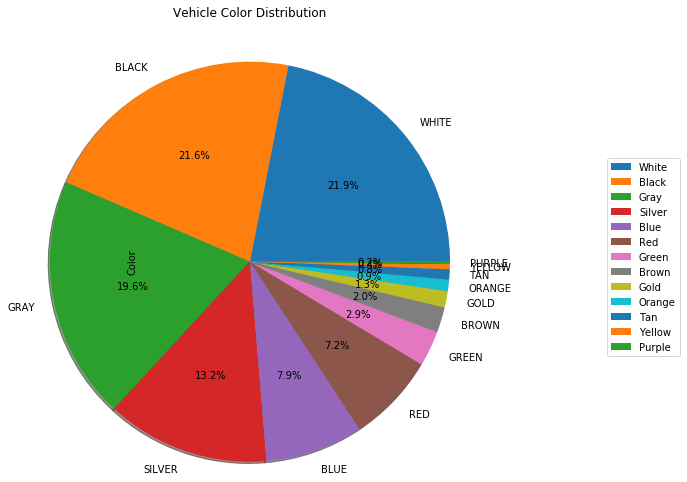

In [9]:
color_pie_chart = color_count[:13].plot.pie(shadow=True, startangle=0, radius=2.3, autopct='%1.1f%%')

title = plt.title('Vehicle Color Distribution', y=1.6)
labels = 'White', 'Black', 'Gray', 'Silver', 'Blue', 'Red', 'Green', 'Brown', 'Gold', 'Orange', 'Tan', 'Yellow', 'Purple', 'Other'
leg = plt.legend(labels,loc='upper right')

bb = leg.get_bbox_to_anchor().inverse_transformed(color_pie_chart.transAxes)

xOffset = 1.5
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = color_pie_chart.transAxes)


The above bar graphs indicates that monochrome colors yield the most parking tickets in the city of Los Angeles. White, black, gray, and silver, account for most parking tickets. These four vehicle colors account for 76.3% of all parking tickets.

## *Data Analysis/Results*

# Part 2: Vehicle Make

**Next, we perform the same process as we did for vehicle color for vehicle make.

In [10]:
# now we use the PC_df DataFrame instead of this 

#Tickets = pd.read_csv("parking-citations.csv")

## *Data Cleaning / Pre Processing*

**We create a function that locates the vehicle codes and standardize them into vehicle makes. The vehicle codes that were indeterminate are left as is and missing values are changed to "Other".**

In [11]:
# Tries to Standardize Models. Some four letter codes
# we couldn't figure out and left them as is. NaN values
# are changed to other
def standardize_Model(string):
    
    if (pd.isnull(string)):
        string = "OTHER"

    if "HOND" in string:
        output = "HONDA"
    elif "VN" in string:
        output = "VANTAGE"
    elif "KW" in string:
        output = "KENWORTH"
    elif "HD" in string:
        output = "HARLEY DAVIDSON"
    elif "VW" in string:
        output = "VOLKSWAGEN"
    elif "LR" in string:
        output = "LAND ROVER"
    elif "MB" in string:
        output = "MERCEDES-BENZ"
    elif "HON" in string:
        output = "HONDA"
    elif "SAA" in string:
        output = "SAAB"
    elif "ROL" in string:
        output = "ROLLS-ROYCE"
    elif "AUD" in string:
        output = "AUDI"
    elif "HNO" in string:
        output = "HINO"
    elif "INF" in string:
        output = "INFINITI"
    elif "MEZ" in string:
        output = "MERCEDES-BENZ"
    elif "LXS" in string:
        output = "LEXUS"
    elif "MRZ" in string:
        output = "MERCEDES-BENZ"
    elif "MZD" in string:
        output = "MAZDA"
    elif "ISU" in string:
        output = "ISUZU"
    elif "MIT" in string:
        output = "MIT"
    elif "LEX" in string:
        output = "LEXUS"
    elif "JAG" in string:
        output = "JAGUAR"
    elif "HYD" in string:
        output = "HYUNDAI"
    elif "HYN" in string:
        output = "HYUNDAI"
    elif "HYU" in string:
        output = "HYUNDAI"
    elif "ACU" in string:
        output = "ACURA"
    elif "BNZ" in string:
        output = "MERCEDES-BENZ"
    elif "BMV" in string:
        output = "BMW"
    elif "MBZ" in string:
        output = "MERCEDES-BENZ"
    elif "SUB" in string:
        output = "SUBARU"
    elif "SAT" in string:
        output = "SATURN"
    elif "HYDA" in string:
        output = "HYUNDAI"
    elif "INFN" in string:
        output = "INFINITI"
    elif "ODYS" in string:
        output = "HONDA"
    elif "MBEZ" in string:
        output = "MERCEDES-BENZ"
    elif "MAZA" in string:
        output = "MAZDA"
    elif "HNDY" in string:
        output = "HYUNDAI"
    elif "MERB" in string:
        output = "MERCEDES-BENZ"
    elif "INFT" in string:
        output = "INFINITI"
    elif "LEXI" in string:
        output = "LEXUS"
    elif "HUMR" in string:
        output = "HUMMER"
    elif "LNRV" in string:
        output = "LAND ROVER"
    elif "ACCU" in string:
        output = "ACURA"
    elif "HYUD" in string:
        output = "HYUD"
    elif "MAZE" in string:
        output = "MASERATI"
    elif "JAGA" in string:
        output = "JAGUAR"
    elif "RNGR" in string:
        output = "LAND ROVER"
    elif "MERS" in string:
        output = "MERCEDES-BENZ"
    elif "MADZ" in string:
        output = "MAZDA"
    elif "HYDI" in string:
        output = "HYUNDAI"
    elif "LXUS" in string:
        output = "LEXUS"
    elif "ACRA" in string:
        output = "ACURA"
    elif "MZDA" in string:
        output = "MAZDA"
    elif "RRVR" in string:
        output = "LAND ROVER"
    elif "SATN" in string:
        output = "SATURN"
    elif "TSLA" in string:
        output = "TESLA"
    elif "HUYN" in string:
        output = "HYUNDAI"
    elif "SATR" in string:
        output = "SATURN"
    elif "FRTL" in string:
        output = "FREIGHTLINER"
    elif "HUND" in string:
        output = "HYUNDAI"
    elif "ROVE" in string:
        output = "LAND ROVER"
    elif "LRVR" in string:
        output = "LAND ROVER"
    elif "WHIT" in string:
        output = "WHITE"
    elif "MITZ" in string:
        output = "MITSUBISHI"
    elif "SMAR" in string:
        output = "SMART"
    elif "HYND" in string:
        output = "HYUNDAI"
    elif "LAND" in string:
        output = "LAND ROVER"
    elif "SUZU" in string:
        output = "SUZUKI"
    elif "LROV" in string:
        output = "LAND ROVER"
    elif "TSMR" in string:
        output = "TESLA"
    elif "ALFA" in string:
        output = "ALFA ROMEO"
    elif "MENZ" in string:
        output = "MERCEDES-BENZ"
    elif "COOP" in string:
        output = "MINI"
    elif "RANG" in string:
        output = "LAND ROVER"
    elif "SABU" in string:
        output = "SUBARU"
    elif "HARL" in string:
        output = "HARLEY-DAVIDSON"
    elif "STLG" in string:
        output = "STERLING"
    elif "ASTO" in string:
        output = "ASTON MARTIN"
    elif "BENT" in string:
        output = "BENTLEY"
    elif "ISUZ" in string:
        output = "ISUZU"
    elif "EXPL" in string:
        output = "FORD"
    elif "DAEW" in string:
        output = "DAEWOO"
    elif "FERR" in string:
        output = "FERRARI"
    elif "SMRT" in string:
        output = "SMART"
    elif "HUMM" in string:
        output = "HUMMER"
    elif "BENT" in string:
        output = "BETLEY"
    elif "LNDR" in string:
        output = "LAND ROVER"
    elif "RROV" in string:
        output = "LAND ROVER"
    elif "SUZI" in string:
        output = "SUZUKI"
    elif "PLYM" in string:
        output = "PLYMOUTH"
    elif "STRN" in string:
        output = "SATURN"
    elif "LEXS" in string:
        output = "LEXUS"
    elif "PORS" in string:
        output = "PORSCHE"
    elif "MNNI" in string:
        output = "MINI"
    elif "FRHT" in string:
        output = "FREIGHTLINER"
    elif "TOYT" in string:
        output = "TOYOTA"
    elif "JAGR" in string:
        output = "JAGUAR"
    elif "BENZ" in string:
        output = "MERCEDES-BENZ"
    elif "MERZ" in string:
        output = "MERCEDES-BENZ"
    elif "SATU" in string:
        output = "SATURN"
    elif "VOLV" in string:
        output = "VOLVO"
    elif "LEXU" in string:
        output = "LEXUS"
    elif "LROW" in string:
        output = "LAND ROVER"
    elif "LINC" in string:
        output = "LINCOLN"
    elif "BUIC" in string:
        output = "BUICK"
    elif "OLDS" in string:
        output = "OLDSMOBILE"
    elif "LROW" in string:
        output = "LAND ROVER"
    elif "VOLK" in string:
        output = "VOLKSWAGEN"
    elif "MITS" in string:
        output = "MITSUBISHI"
    elif "FREI" in string:
        output = "FREIGHTLINER"
    elif "CADI" in string:
        output = "CADILLAC"
    elif "INFI" in string:
        output = "INFINITI"
    elif "MERC" in string:
        output = "MERCURY"
    elif "SCIO" in string:
        output = "SCION"
    elif "NISS" in string:
        output = "NISSAN"
    elif "ACUR" in string:
        output = "ACURA"
    elif "CHEV" in string:
        output = "CHEVROLET"
    elif "MAZD" in string:
        output = "MAZDA"
    elif "TOYO" in string:
        output = "TOYOTA"
    elif "CHRY" in string:
        output = "CHEVROLET"
    elif "PTRB" in string:
        output = "PETERBILT"
    elif "MBNZ" in string:
        output = "MERCEDES-BENZ"
    elif "HYUN" in string:
        output = "HYUNDAI"
    elif "MASE" in string:
        output = "MASERATI"
    elif "PONT" in string:
        output = "PONTIAC"
    elif "TESL" in string:
        output = "TESLA"
    elif "DODG" in string:
        output ="DODGE"
    elif "SUBA" in string:
        output = "SUBARU"
    # Otherwise, if uncaught - keep as is
    else:
        output = string
    
    return output

**We apply the function and verify that the vehicle makes have been standardized.**

In [12]:
## Standardize the Models
PC_df["Make"] = PC_df["Make"].apply(standardize_Model)
PC_df.head()

,Make,Body Style,Color,Agency,Violation code,Violation Description
0,HONDA,PA,GRAY,1.0,4000A1,NO EVIDENCE OF REG
1,GMC,VN,WHITE,1.0,4000A1,NO EVIDENCE OF REG
2,NISSAN,PA,BLACK,2.0,8939,WHITE CURB
3,ACURA,PA,WHITE,2.0,000,17104h
4,CHEVROLET,PA,BLACK,1.0,8069A,NO STOPPING/STANDING


**We count the number of values per make.**

In [13]:
# The number of Tickets for Each Car Model
Tickets_CarModels = PC_df["Make"].value_counts()
Tickets_CarModels

TOYOTA           1536296
HONDA             990443
FORD              768459
CHEVROLET         713916
NISSAN            627333
BMW               401551
MERCEDES-BENZ     364486
VOLKSWAGEN        301696
HYUNDAI           270876
LEXUS             261335
DODGE             257067
KIA               204801
JEEP              202934
AUDI              170535
MAZDA             161011
OTHR              146807
GMC               126096
INFINITI          114176
ACURA             106173
SUBARU             95318
VOLVO              84797
MIT                76191
CADILLAC           68638
LAND ROVER         68022
MINI               64607
PORSCHE            44797
FREIGHTLINER       42761
UNK                41545
BUICK              41349
PONTIAC            39534
                  ...   
FREL                   1
SA                     1
NEWS                   1
MECV                   1
HAVA                   1
MH                     1
ALLP                   1
LCON                   1
HLDS                   1


**To compare the percentage of vehicle makes who do receive tickets, we utilize the DMV dataset and extract the total number of vehicle registrations by make and location.**

In [23]:
# Data from DMV.gov that contains the car registrations
# for all of California
url = "https://www.dmv.ca.gov/portal/wcm/connect/d0faaf2e-0b1a-43a5-96a4-15dbd2e3eff8/VehicleCount_070118.csv?MOD=AJPERES&CVID="
s = requests.get(url).content
California_Cars = pd.read_csv(io.StringIO(s.decode('utf-8')))

/Users/Johnny/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
# Create a List that contains the number of registered
# vehicles for each car Model

California_CarModels = California_Cars.groupby('Make')['Vehicles'].sum()

**We locate all the vehicle makes in Los Angeles by first identifying all vehicle makes within the Los Angeles zip codes.**

In [25]:
# Get the number of vehicles just in LA

# First Filter through all the Registered Cars and get
# the ones with zip codes in LA County

# Get rid of Zip Codes that are out of State
LA_Cars = California_Cars[California_Cars['ZIP'] != 'OOS']
# Get rid of Zip Codes that are not labeled
LA_Cars = LA_Cars[LA_Cars['ZIP'] != 'Other']

# Convert Remaing Zip Codes to numeric values
LA_Cars['ZIP'] = pd.to_numeric(LA_Cars['ZIP'])
# Finally Get Zip Codes that are only in LA
lowest_ZIP = 90001 # Lowest LA Zip Code
highest_ZIP = 90899 # Highest LA Zip Code

LA_Cars = LA_Cars.loc[(LA_Cars['ZIP'] >= lowest_ZIP) & (LA_Cars['ZIP'] <= highest_ZIP)]

# Create a List that contains the number of registered
# vehicles in LA for each car Model

LA_CarModels = LA_Cars.groupby('Make')['Vehicles'].sum()

**We sum up the total number of cars in California and Los Angeles.**

In [26]:
total_Cars_California = California_Cars['Vehicles'].sum()
total_Cars_LA = LA_Cars['Vehicles'].sum()

print("Total cars in California: ", total_Cars_California, 
      "     Total cars in LA: ", total_Cars_LA)

Total cars in California:  31023133      Total cars in LA:  4310532


**We then compare the ratio of vehicle make to the number of tickets received.**

In [27]:
# Comparing Toyota and Ferrari

# Get number of Toyotas
number_ToyotaCA = California_CarModels["TOYOTA"]
number_ToyotaLA = LA_CarModels["TOYOTA"]
number_ToyotaTickets = Tickets_CarModels["TOYOTA"]

# Get number of Ferraris
number_FerrariCA = California_CarModels["FERRARI"]
number_FerrariLA = LA_CarModels["FERRARI"]
number_FerrariTickets = Tickets_CarModels["FERRARI"]

In [29]:
# Statements
print("The percentage of Toyotas in California is ",((number_ToyotaCA/total_Cars_California) * 100))
print("The percentage of Toyotas in Los Angeles is",((number_ToyotaLA/total_Cars_LA)*100))
print("The percentage of tickets given to Toyotas is",((number_ToyotaTickets/len(PC_df))*100))

print("The percentage of Ferrari California is ",((number_FerrariCA/total_Cars_California) * 100))
print("The percentage of Ferrari in Los Angeles is",((number_FerrariLA/total_Cars_LA)*100))
print("The percentage of tickets given to Ferraris is",((number_FerrariTickets/len(PC_df))*100))


The percentage of Toyotas in California is  17.591685533501725
The percentage of Toyotas in Los Angeles is 18.882936027385945
The percentage of tickets given to Toyotas is 17.50091360862191
The percentage of Ferrari California is  0.0029719757833614035
The percentage of Ferrari in Los Angeles is 0.007841259501147422
The percentage of tickets given to Ferraris is 0.014740767540602042


As you can see the percentage of Ferraris given tickets is twice the percentage of Ferraris in Los Angeles and more than four times the percentage of Ferraris in California. This is interesting compared to the fact the percentage of Toyotas that receive tickets and the percentage of Toyotas in LA and California seem relatively equal.

**We also compare the specific types of violations related to vehicle make.**

In [31]:
# Get the No Stopping Tickets Violation Code is 8069A
no_StoppingTickets = PC_df[PC_df["Violation code"] == "8069A"]

In [32]:
print( "Percentage of No Stopping tickets given to Ferraris is ",(no_StoppingTickets["Make"].value_counts()['FERRARI']/len(no_StoppingTickets)) * 100)


Percentage of No Stopping tickets given to Ferraris is  0.02674511901577962


## *Data Visualization*

**We plot the top x makes on a bar graph.**

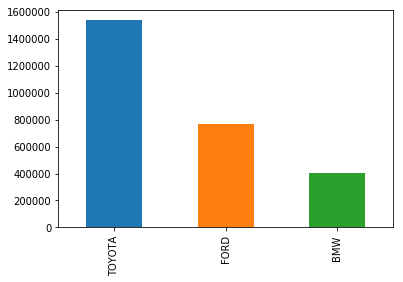

In [33]:
Tickets_CarModels[["TOYOTA", "FORD", "BMW"]].plot(kind = 'bar')

**We transform the data into percentages and plot it on a bar graph.**

In [ ]:
# Getting Values
per_TOYTCA = ((number_ToyotaCA/total_Cars_California) * 100)
per_TOYTLA = ((number_ToyotaLA/total_Cars_LA)*100)
per_TOYTTIC = ((number_ToyotaTickets/len(PC_df))*100)

per_FERCA = ((number_FerrariCA/total_Cars_California) * 100)
per_FERLA = ((number_FerrariLA/total_Cars_LA)*100)
per_FERTIC = ((number_FerrariTickets/len(PC_df))*100)

In [34]:
def getPercentage(string):
    
    number_CARSCA = California_CarModels[string]
    number_CARSLA = LA_CarModels[string]
    number_CARSTickets = Tickets_CarModels[string]

    per_CARSCA = ((number_CARSCA/total_Cars_California) * 100)
    per_CARSLA = ((number_CARSLA/total_Cars_LA)*100)
    per_CARSTIC = ((number_CARSTickets/len(PC_df))*100)
    
    return per_CARSCA, per_CARSLA, per_CARSTIC

In [35]:
# Create Data Frame
Percentages = pd.DataFrame()

Car = "Jaguar"
Tag = "JAGUAR"

CA,LA,TIC = getPercentage(Tag)
d = {'Car Model': [Car], 'Percentage CA': [CA], 'Percentage LA': [LA], 'Percentage Tickets': [TIC]}
Percentages = Percentages.append(pd.DataFrame(data = d))

Car = "Tesla"
Tag = "TESLA"

CA,LA,TIC = getPercentage(Tag)
d = {'Car Model': [Car], 'Percentage CA': [CA], 'Percentage LA': [LA], 'Percentage Tickets': [TIC]}
Percentages = Percentages.append(pd.DataFrame(data = d))

Car = "Maserati"
Tag = "MASERATI"

CA,LA,TIC = getPercentage(Tag)
d = {'Car Model': [Car], 'Percentage CA': [CA], 'Percentage LA': [LA], 'Percentage Tickets': [TIC]}
Percentages = Percentages.append(pd.DataFrame(data = d))

Car = "Land Rover"
Tag = "LAND ROVER"

CA,LA,TIC = getPercentage(Tag)
d = {'Car Model': [Car], 'Percentage CA': [CA], 'Percentage LA': [LA], 'Percentage Tickets': [TIC]}
Percentages = Percentages.append(pd.DataFrame(data = d))


In [36]:
# Set DataFrame
Percentages = Percentages.set_index("Car Model")
Percentages = Percentages.round(2)

<Figure size 864x576 with 0 Axes>

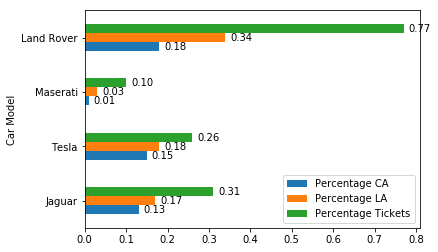

In [37]:
# Plot the figure.
plt.figure(figsize=(12, 8))
ax = Percentages.plot(kind='barh')

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with two decimal place
    label = "{:.2f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

In [38]:
# Create Data Frame
Percentages = pd.DataFrame()

Car = "Ford"
Tag = "FORD"

CA,LA,TIC = getPercentage(Tag)
d = {'Car Model': [Car], 'Percentage CA': [CA], 'Percentage LA': [LA], 'Percentage Tickets': [TIC]}
Percentages = Percentages.append(pd.DataFrame(data = d))

Car = "Acura"
Tag = "ACURA"

CA,LA,TIC = getPercentage(Tag)
d = {'Car Model': [Car], 'Percentage CA': [CA], 'Percentage LA': [LA], 'Percentage Tickets': [TIC]}
Percentages = Percentages.append(pd.DataFrame(data = d))

Car = "Toyota"
Tag = "TOYOTA"

CA,LA,TIC = getPercentage(Tag)
d = {'Car Model': [Car], 'Percentage CA': [CA], 'Percentage LA': [LA], 'Percentage Tickets': [TIC]}
Percentages = Percentages.append(pd.DataFrame(data = d))

Car = "KIA"
Tag = "KIA"

CA,LA,TIC = getPercentage(Tag)
d = {'Car Model': [Car], 'Percentage CA': [CA], 'Percentage LA': [LA], 'Percentage Tickets': [TIC]}
Percentages = Percentages.append(pd.DataFrame(data = d))


In [39]:
# Set DataFrame
Percentages = Percentages.set_index("Car Model")
Percentages = Percentages.round(2)

<Figure size 864x576 with 0 Axes>

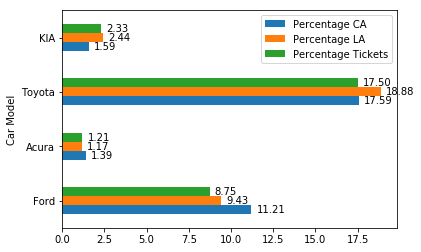

In [40]:
# Plot the figure.
plt.figure(figsize=(12, 8))
ax = Percentages.plot(kind='barh')

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.2f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.
    

In [41]:
# Create Data Frame
Percentages = pd.DataFrame()

Car = "BMW"
Tag = "BMW"

CA,LA,TIC = getPercentage(Tag)
d = {'Car Model': [Car], 'Percentage CA': [CA], 'Percentage LA': [LA], 'Percentage Tickets': [TIC]}
Percentages = Percentages.append(pd.DataFrame(data = d))

Car = "Mercedes-Benz"
Tag = "MERCEDES-BENZ"

CA,LA,TIC = getPercentage(Tag)
d = {'Car Model': [Car], 'Percentage CA': [CA], 'Percentage LA': [LA], 'Percentage Tickets': [TIC]}
Percentages = Percentages.append(pd.DataFrame(data = d))

Car = "Lexus"
Tag = "LEXUS"

CA,LA,TIC = getPercentage(Tag)
d = {'Car Model': [Car], 'Percentage CA': [CA], 'Percentage LA': [LA], 'Percentage Tickets': [TIC]}
Percentages = Percentages.append(pd.DataFrame(data = d))

Car = "Audi"
Tag = "AUDI"

CA,LA,TIC = getPercentage(Tag)
d = {'Car Model': [Car], 'Percentage CA': [CA], 'Percentage LA': [LA], 'Percentage Tickets': [TIC]}
Percentages = Percentages.append(pd.DataFrame(data = d))


In [42]:
# Set DataFrame
Percentages = Percentages.set_index("Car Model")
Percentages = Percentages.round(2)

<Figure size 864x576 with 0 Axes>

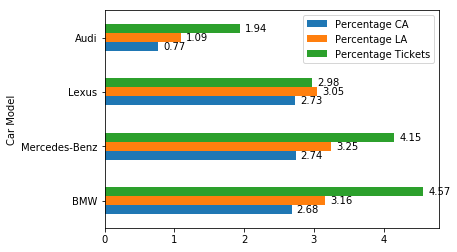

In [43]:
# Plot the figure.
plt.figure(figsize=(12, 8))
ax = Percentages.plot(kind='barh')

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.2f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.
    

**I think if you use the examples and just copy and paste but change variable names and Model names you could create a Bar Graph that has more models. I was think probably two with 5 models each. Some suggestions for Models might be BMW, AUDI, FORD, ACURA, MERCEDES-BENZ and LEXUS. Model names are all in caps in the dataframe**

In [44]:
# This is a list of the 60 models with the most tickets. If you change the number you can look through the Models. Before
# you use it I would just check that the Model is in CA_CarModels["(model name her)"], some of the model names aren't and
# thus we can't do analysis
Tickets_CarModels[:60]

TOYOTA             1536296
HONDA               990443
FORD                768459
CHEVROLET           713916
NISSAN              627333
BMW                 401551
MERCEDES-BENZ       364486
VOLKSWAGEN          301696
HYUNDAI             270876
LEXUS               261335
DODGE               257067
KIA                 204801
JEEP                202934
AUDI                170535
MAZDA               161011
OTHR                146807
GMC                 126096
INFINITI            114176
ACURA               106173
SUBARU               95318
VOLVO                84797
MIT                  76191
CADILLAC             68638
LAND ROVER           68022
MINI                 64607
PORSCHE              44797
FREIGHTLINER         42761
UNK                  41545
BUICK                41349
PONTIAC              39534
SATURN               39146
LINCOLN              38185
GRUM                 37381
FIAT                 32903
JAGUAR               27446
MERCURY              25682
TESLA                22737
I

## *Color and Model Visualization*
#### Of the top car colors what are the makes of those cars?

Visualize all "White" models

In [45]:
all_white_cars = PC_df.loc[(PC_df['Color'] == 'WHITE') & (PC_df['Make'] == 'TOYOTA')]

#temp = all_white_cars.unique()
#temp.value_count()

# Plot with Labels
#plot_white = all_white_cars.plot(kind='bar')

#for p in plot_white.patches:
    #plot_white.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Data Analysis and Results

# Privacy/Ethics Considerations

The data was posted on Kaggle’s data set page but the information is released to the public via DataLA, a public site maintained by the Los Angeles government. We have permission to use this data under the Open Database License. There are no privacy concerns in regard to the data. This data set is potentially biased in terms of who it composes for two reasons. The first is regional factors. For example if parking officials stay in a neighborhood where the parking restrictions are stricter then we would expect the models of the cars in that neighborhood to be over represented in the data set. The second reason is that some violations may be more for lower income individuals. For example we would expect lower income individuals to receive more expired registration violations because of their inability to afford registration. If we identify any of these issues, we can modify our research topic so that it does not include biased data. For example we will not analyze expired registration violations if we identify that the data is heavily skewed towards lower income models.

In addition, our dataset was already efficient in not including much personal identifiers of the individuals whose vehicles have received citations. We practiced the Safe Harbor method, in which we removed the VIN column from our dataset to further improve its anonymization. Thus, our project considerably respects the privacy of the individuals whose vehicles received citations as we have altered the dataset to focus solely on the vehicles.

# Conclusion and Discussion